In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
post_df_full = pd.read_excel("Data/warriors.xlsx")

### Phân tích lượt reaction theo ngày

In [44]:
post_df = post_df_full[['time', 'reaction_count']]
post_df

,time,reaction_count
0,2023-11-28 08:06:42,733
1,2023-11-28 03:47:43,2329
2,2023-11-28 02:25:48,1384
3,2023-11-28 01:39:29,4693
4,2023-11-28 00:41:11,3864
...,...,...
115,2023-11-14 20:18:00,24214
116,2023-11-14 20:05:00,4053
117,2023-11-14 19:58:00,3716
118,2023-11-14 19:52:00,11473


In [45]:
dates=post_df['time'].to_list()
y=post_df['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

120 120
[Timestamp('2023-11-14 19:32:00'), Timestamp('2023-11-14 19:52:00'), Timestamp('2023-11-14 19:58:00'), Timestamp('2023-11-14 20:05:00'), Timestamp('2023-11-14 20:18:00'), Timestamp('2023-11-14 20:33:00'), Timestamp('2023-11-14 20:51:00'), Timestamp('2023-11-14 21:02:00'), Timestamp('2023-11-14 21:38:00'), Timestamp('2023-11-14 23:30:00'), Timestamp('2023-11-16 00:13:55'), Timestamp('2023-11-16 04:22:03'), Timestamp('2023-11-16 04:30:51'), Timestamp('2023-11-16 21:24:03'), Timestamp('2023-11-17 00:00:09'), Timestamp('2023-11-17 08:05:16'), Timestamp('2023-11-17 08:23:50'), Timestamp('2023-11-17 08:29:44'), Timestamp('2023-11-17 09:35:00'), Timestamp('2023-11-17 10:14:21'), Timestamp('2023-11-17 10:28:12'), Timestamp('2023-11-17 10:51:21'), Timestamp('2023-11-17 11:15:28'), Timestamp('2023-11-17 12:23:44'), Timestamp('2023-11-17 13:30:07'), Timestamp('2023-11-18 01:31:12'), Timestamp('2023-11-18 02:56:22'), Timestamp('2023-11-18 21:05:00'), Timestamp('2023-11-19 00:43:00'), Times

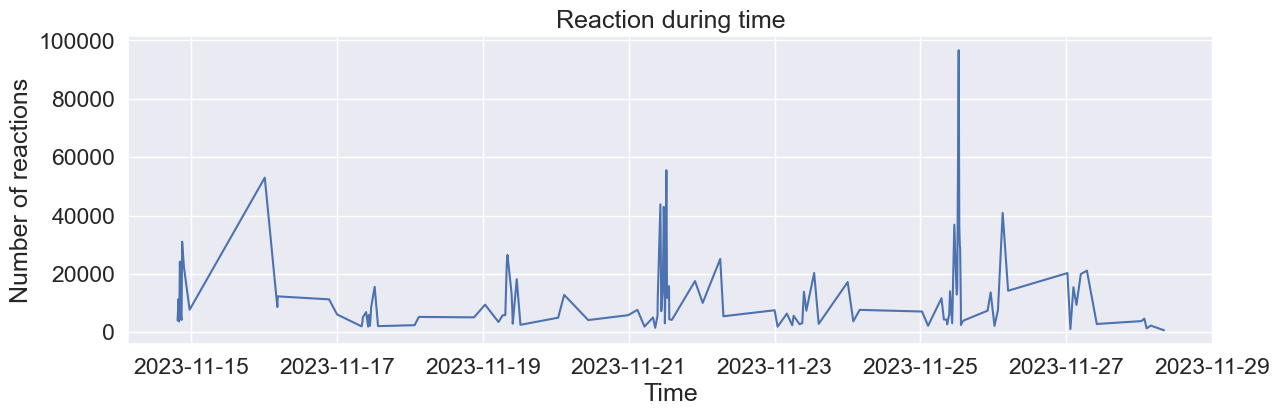

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(dates,y)
plt.title("Reaction during time")
plt.xlabel("Time")
plt.ylabel("Number of reactions")
plt.show()

### Phân tích lượt reaction theo từng loại cảm xúc

In [47]:
post_df_full['reactions'] = post_df_full['reactions'].apply(lambda x: eval(x))
post_df_full_reactions = pd.DataFrame(post_df_full['reactions'].tolist())

In [48]:
post_df_full_with_reactions = pd.concat([post_df_full, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions = post_df_full_with_reactions.fillna(0)
post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"""He's a true hooper, so obviously he's going t...",401,319,0.0,2.0,0.0,0.0,11,13,18,733
1,In-Season Tournament matchup against the Kings...,1311,975,1.0,5.0,1.0,0.0,36,38,38,2329
2,"The Dubs have 44 dunks so far this season, res...",891,475,1.0,6.0,0.0,0.0,11,20,24,1384
3,Play that back one time ▶️\n\nVerizon || Plays...,2902,1709,5.0,25.0,0.0,2.0,50,57,32,4693
4,"""Yes, sir. Yes, sir. Yes, sir!""\n\nStephen Cur...",2062,1733,25.0,3.0,0.0,1.0,40,120,59,3864
...,...,...,...,...,...,...,...,...,...,...,...
115,Career-high points for the rook before the half,13881,10085,19.0,31.0,2.0,2.0,194,292,300,24214
116,"Behind-the-back to the rack\nthat's nice, Dari...",2590,1418,0.0,11.0,0.0,1.0,33,59,59,4053
117,12 points in 12 minutes\nBrandin' is BALLING\n...,2240,1428,1.0,7.0,0.0,1.0,39,81,70,3716
118,Tough bucket,6821,4525,23.0,24.0,3.0,3.0,74,139,172,11473


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


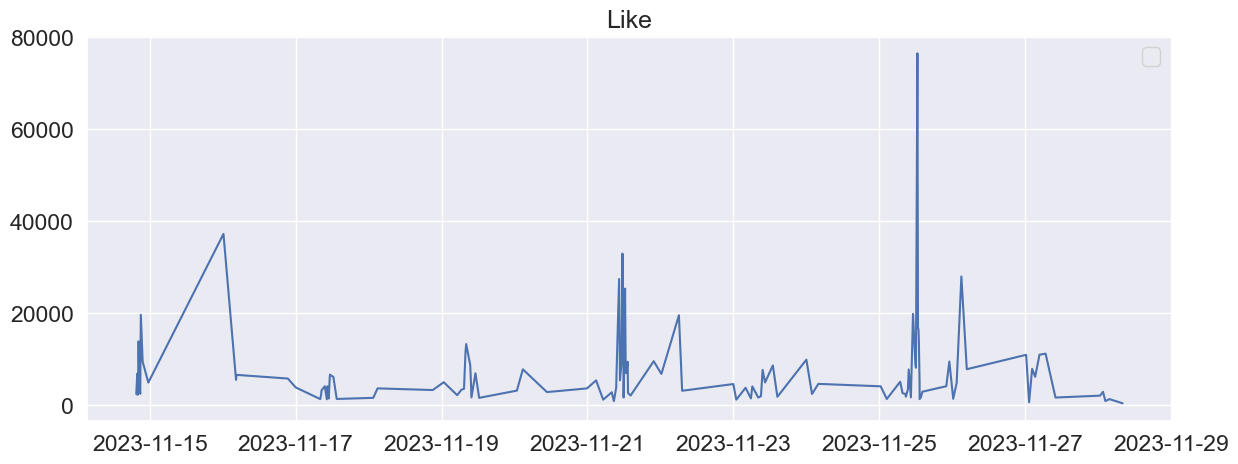

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thích'])
ax.set_title("Like")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


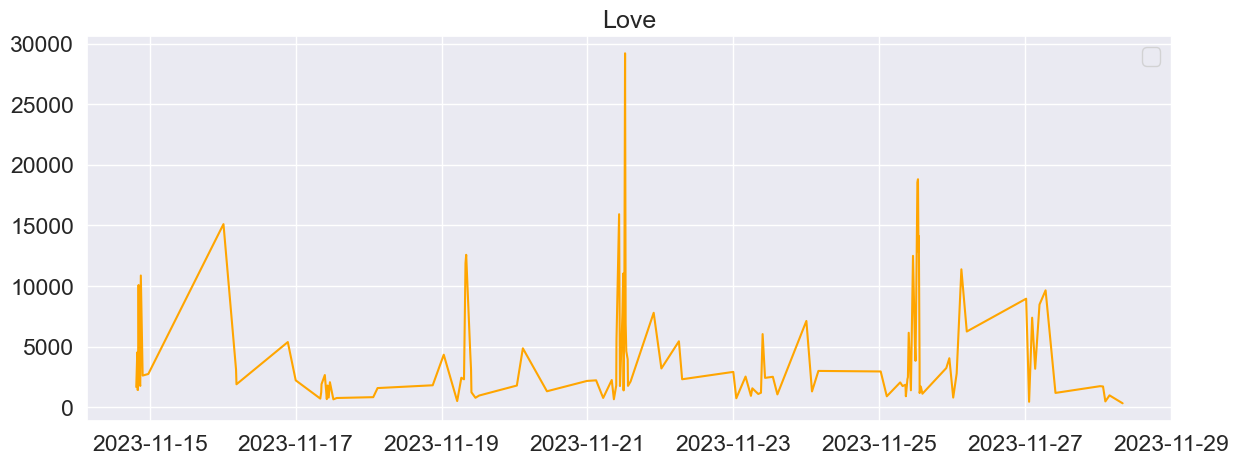

In [66]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['yêu thích'], color= 'orange')
ax.set_title("Love")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


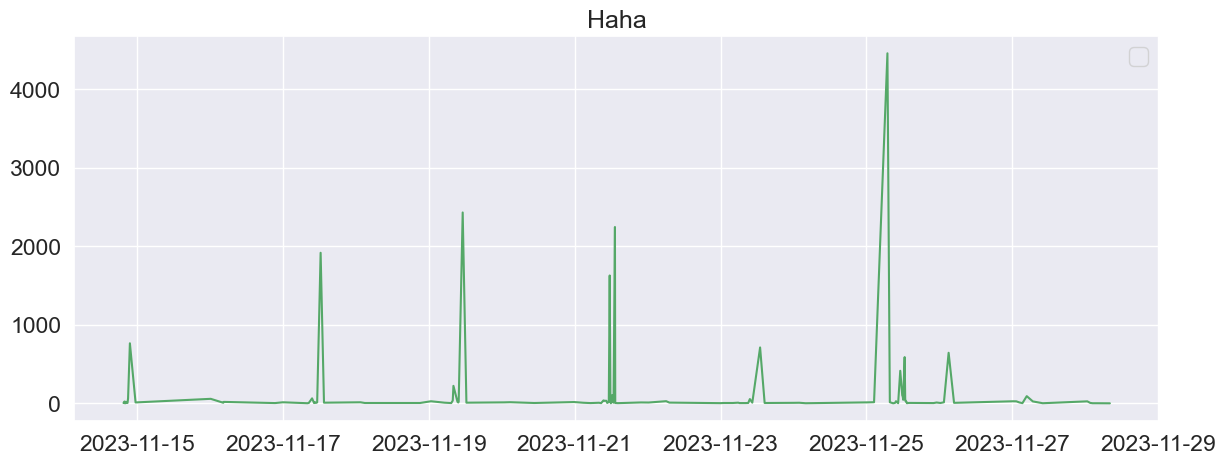

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], color= 'g')
ax.set_title("Haha")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


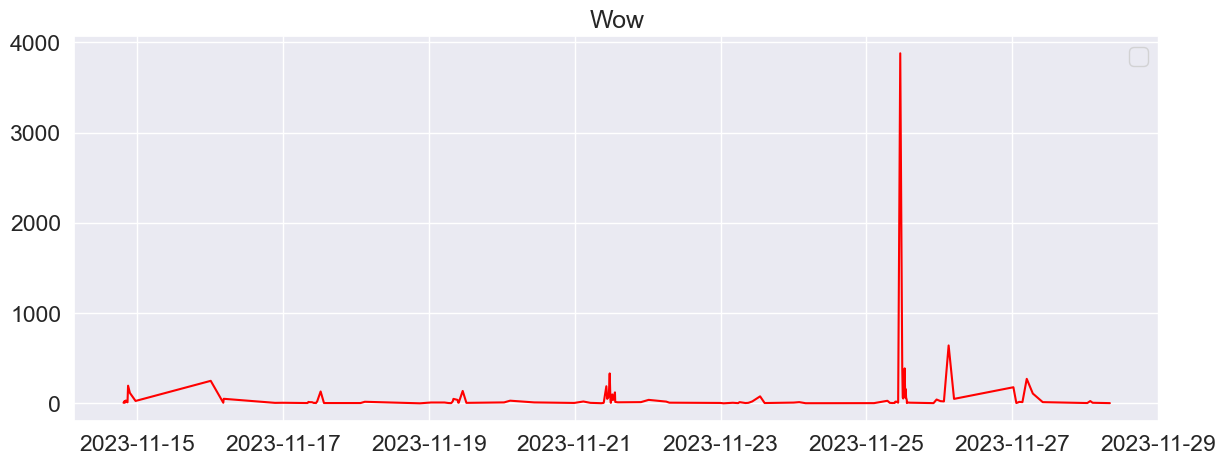

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], color= 'red')
ax.set_title("Wow")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


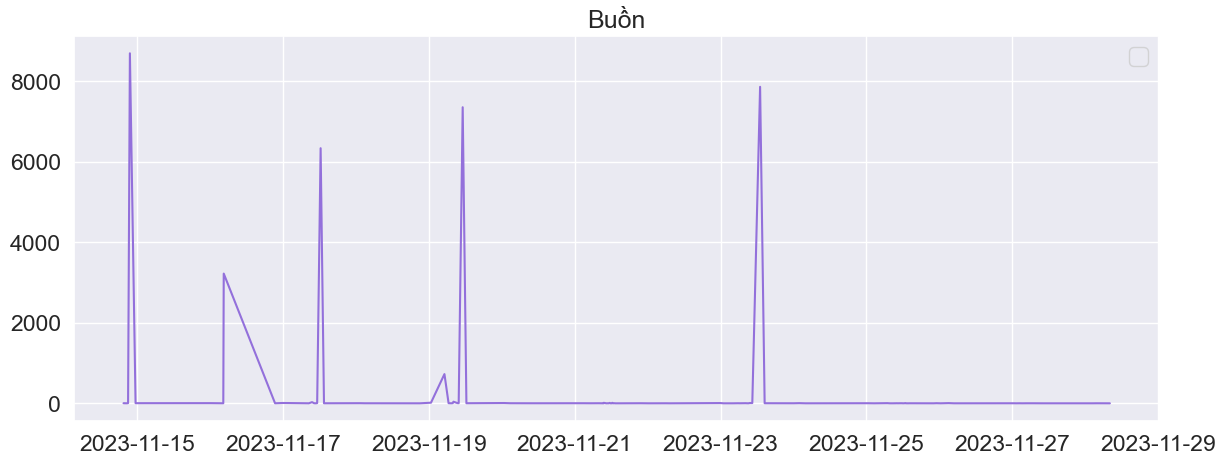

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['buồn'], color= 'mediumpurple')
ax.set_title("Buồn")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


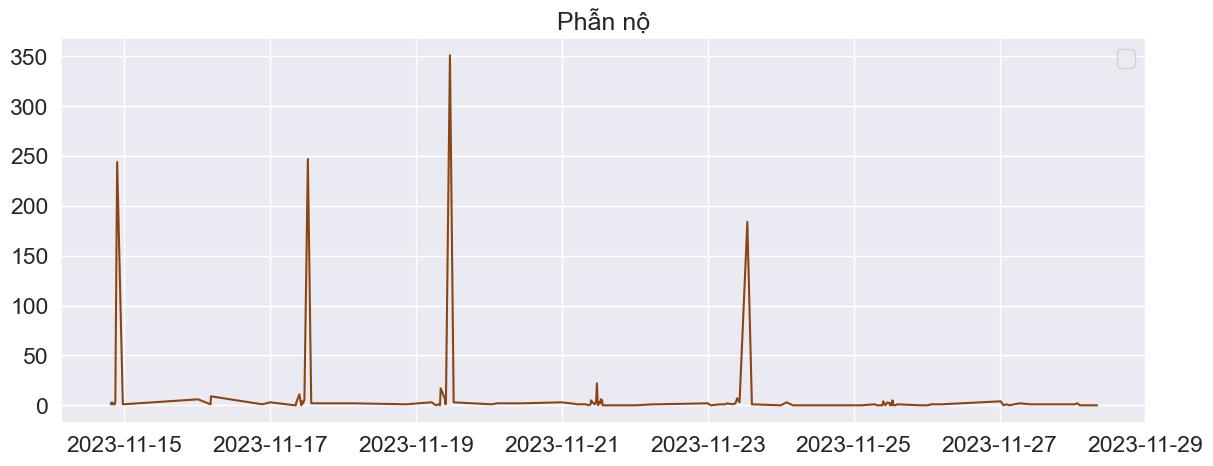

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['phẫn nộ'], color= 'saddlebrown')
ax.set_title("Phẫn nộ")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


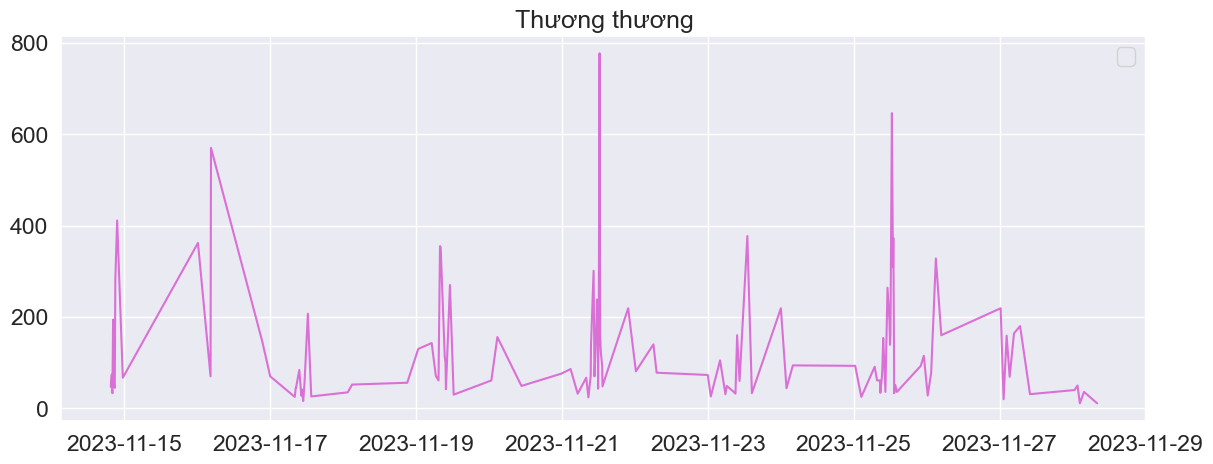

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thương thương'], color= 'orchid')
ax.set_title("Thương thương")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


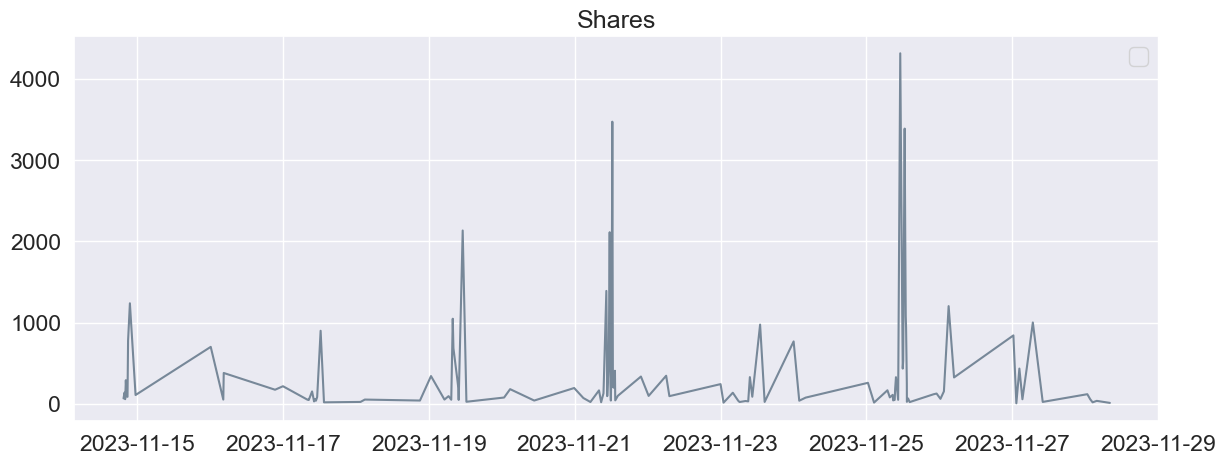

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], color= 'lightslategrey')
ax.set_title("Shares")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


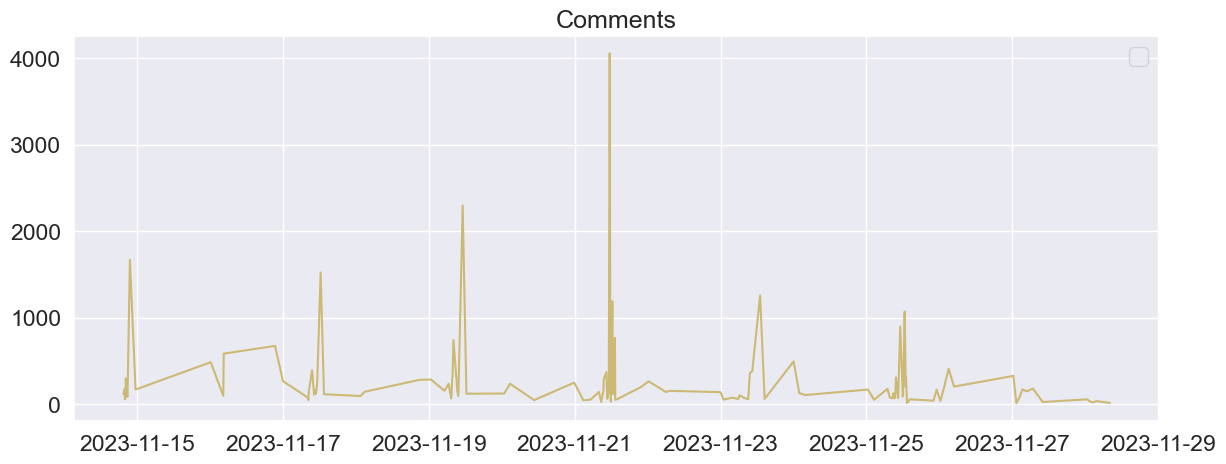

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], color= 'y')
ax.set_title("Comments")
ax.legend()
plt.show()

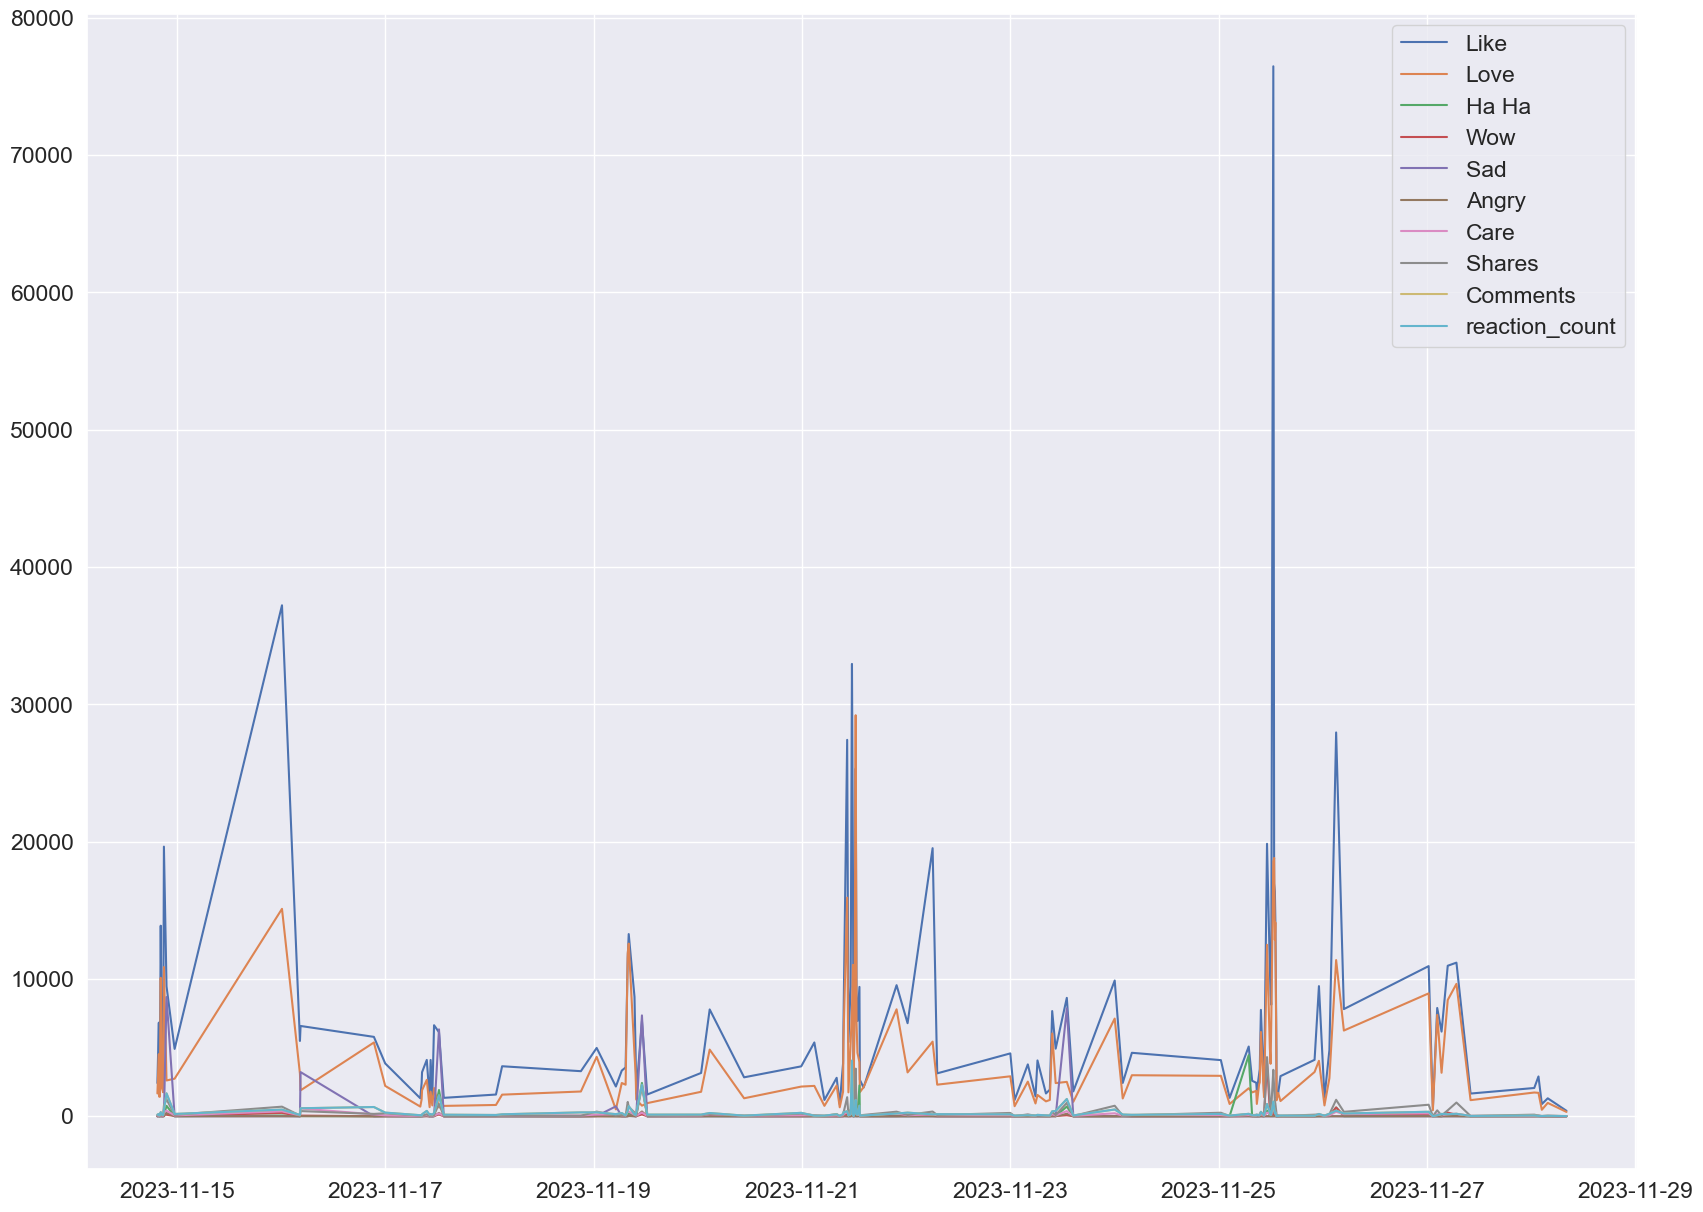

In [58]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thích'], label = "Like")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['yêu thích'], label = "Love")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['buồn'], label = "Sad")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['phẫn nộ'], label = "Angry")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thương thương'], label = "Care")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count")

plt.legend()

### Tính số reactions trung bình theo từng loại

In [59]:
average_df = pd.DataFrame(post_df_full_with_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 
                                                       'thương thương', 'shares', 'comments','reaction_count']].mean()).T
average_df

,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,7109.708333,4172.75,147.725,77.941667,287.133333,10.458333,127.3,382.475,282.7,11933.016667


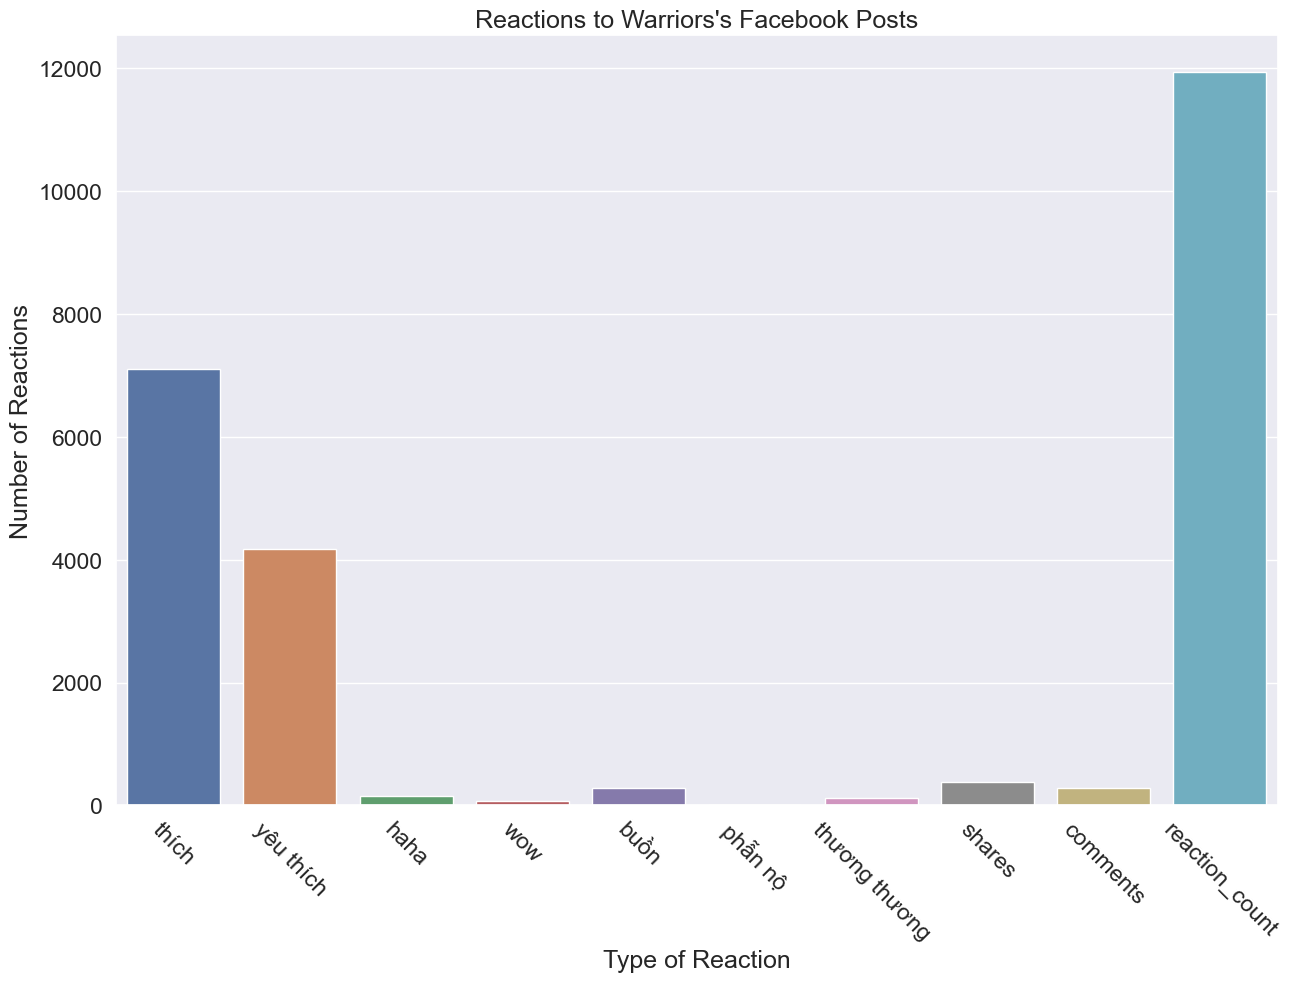

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.5)
ax = sns.barplot(x=list(average_df.keys()), y=list(average_df.values[0]))
ax.set_title("Reactions to Warriors's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

plt.show()

### Post có lượt reactions cao nhất

In [61]:
max_reaction_post = post_df_full.loc[post_df_full['reaction_count'].idxmax()]
max_reaction_post

Unnamed: 0.1                                                                    25
Unnamed: 0                                                                      25
post_id                                                           1038750400949204
text                             Stephen Curry never stops moving ⚡️\n\nStephen...
post_text                        Stephen Curry never stops moving ⚡️\n\nStephen...
time                                                           2023-11-25 12:34:54
image                                                                      unknown
image_lowquality                 https://scontent.fhan14-3.fna.fbcdn.net/v/t15....
images                                                                          []
images_description                                                              []
images_lowquality                ['https://scontent.fhan14-3.fna.fbcdn.net/v/t1...
images_lowquality_description                                               [None]
vide